In [57]:
import dolfin as d
import mshr

In [67]:
c = mshr.Circle(d.Point(0,0), 1., 32)

In [68]:
mesh = mshr.generate_mesh(c,8)
fs = d.FunctionSpace(mesh, 'Lagrange', 1)
boundary_parts = d.MeshFunction("uint", mesh, mesh.topology().dim()-1)

DEBUG:FFC:Reusing form from cache.


In [69]:
class OutsideBoundary(d.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

In [70]:
ob = OutsideBoundary()
ob.mark(boundary_parts, 0)

In [71]:
# now I need to build the variational formulation
u = d.TrialFunction(fs)
v = d.TestFunction(fs)
kappa = d.Function(fs)

In [72]:
#interior operator A
rhs = d.Expression('cos(atan(x[1] / x[0]))')
a = d.inner(d.exp(kappa) * d.nabla_grad(u), d.nabla_grad(v))*d.dx
f = d.inner(rhs, v)*d.ds(0, subdomain_data=boundary_parts)

In [73]:
u_sol = d.Function(fs)
d.solve(a==f, u_sol)

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


In [74]:
# for ipython notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri

def mesh2triang(mesh):
    xy = mesh.coordinates()
    return tri.Triangulation(xy[:, 0], xy[:, 1], mesh.cells())

def plot(obj):
    plt.gca().set_aspect('equal')
    if isinstance(obj, d.Function):
        mesh = obj.function_space().mesh()
        if (mesh.geometry().dim() != 2):
            raise(AttributeError)
        if obj.vector().size() == mesh.num_cells():
            C = obj.vector().array()
            plt.tripcolor(mesh2triang(mesh), C)
            plt.colorbar()
        else:
            C = obj.compute_vertex_values(mesh)
            plt.tripcolor(mesh2triang(mesh), C, shading='gouraud')
            plt.colorbar()
    elif isinstance(obj, d.Mesh):
        if (obj.geometry().dim() != 2):
            raise(AttributeError)
        plt.triplot(mesh2triang(obj), color='k')


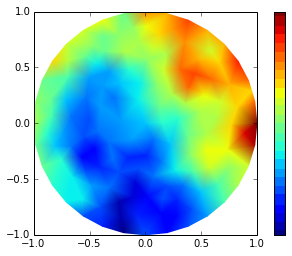

In [75]:
plot(u_sol)